<h2>Dataset Link</h2>

https://www.kaggle.com/datasets/saurabhshahane/ecommerce-text-classification/data

<h2>Data Preprocessing</h2>

In [1]:
import pandas as pd
import numpy as np
import re
import string
import nltk
import contractions
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Download NLTK resources
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('wordnet')

In [2]:
df = pd.read_csv('Dataset/ecommerceDataset.csv', header=None, names=['Label', 'Text'])
df.head()

,Label,Text
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50425 entries, 0 to 50424
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   50425 non-null  object
 1   Text    50424 non-null  object
dtypes: object(2)
memory usage: 788.0+ KB


In [4]:
df.isna().sum()

Label    0
Text     1
dtype: int64

In [5]:
df[df['Text'].isna()]

,Label,Text
39330,Clothing & Accessories,NaN


In [6]:
df.dropna(inplace=True)

In [7]:
df.duplicated().sum()

22622

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(27802, 2)

In [10]:
df['Label'].unique()

array(['Household', 'Books', 'Clothing & Accessories', 'Electronics'],
      dtype=object)

In [11]:
df['Label'].value_counts()

Label
Household                 10564
Books                      6256
Clothing & Accessories     5674
Electronics                5308
Name: count, dtype: int64

<h2>EDA</h2>

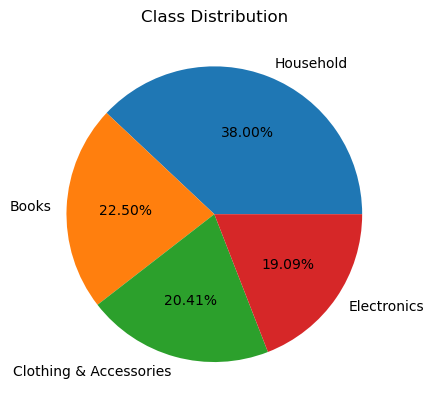

In [12]:
plt.pie(df['Label'].value_counts(), labels=df['Label'].value_counts().index, autopct='%1.2f%%')
plt.title("Class Distribution")
plt.show();

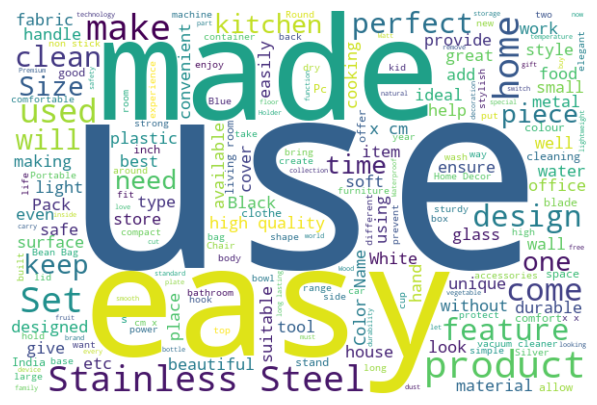

In [13]:
household_class = df[df['Label'] == 'Household']
household_class = ' '.join(household_class['Text'])

# Generate the word cloud
wordcloud = WordCloud(width=600, height=400, background_color='white').generate(household_class)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show();

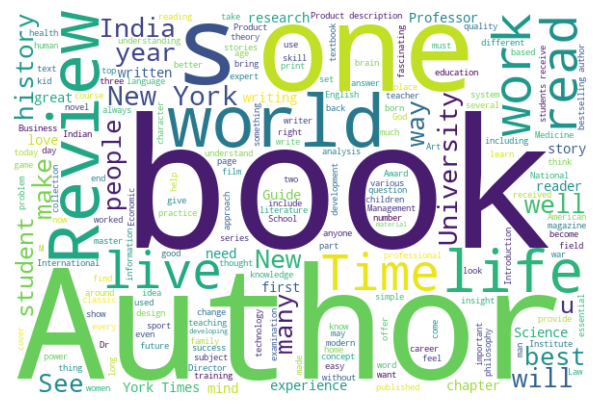

In [14]:
books_class = df[df['Label'] == 'Books']
books_class = ' '.join(books_class['Text'])

# Generate the word cloud
wordcloud = WordCloud(width=600, height=400, background_color='white').generate(books_class)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show();

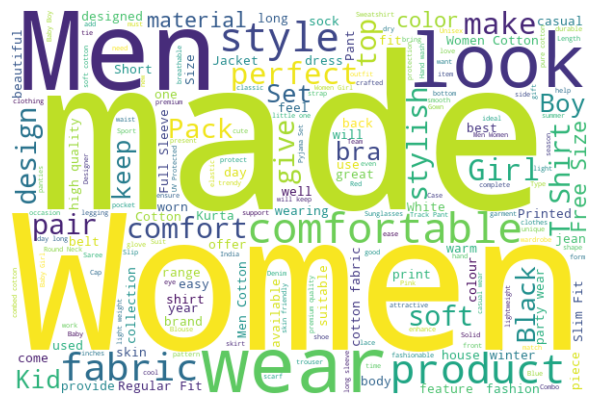

In [15]:
ca_class = df[df['Label'] == 'Clothing & Accessories']
ca_class = ' '.join(ca_class['Text'])

# Generate the word cloud
wordcloud = WordCloud(width=600, height=400, background_color='white').generate(ca_class)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show();

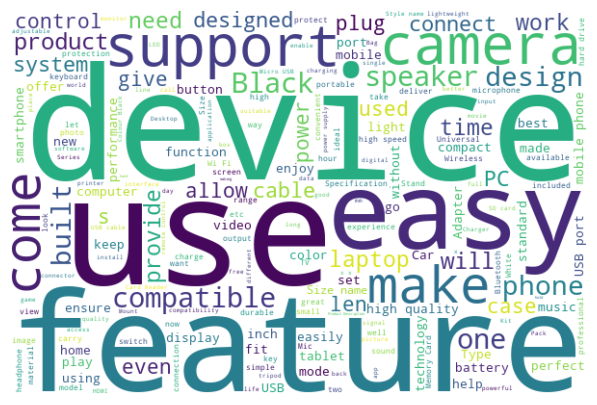

In [16]:
electronics_class = df[df['Label'] == 'Electronics']
electronics_class = ' '.join(electronics_class['Text'])

# Generate the word cloud
wordcloud = WordCloud(width=600, height=400, background_color='white').generate(electronics_class)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show();

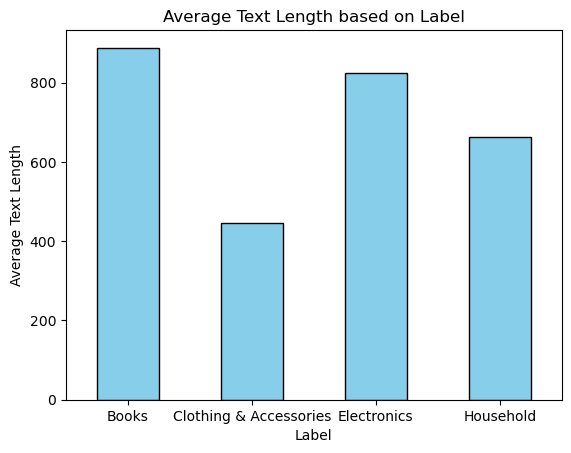

In [17]:
df['text_length'] = df['Text'].apply(len)
avg_text_length_before = df.groupby('Label')['text_length'].mean()

avg_text_length_before.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Text Length based on Label')
plt.xlabel('Label')
plt.ylabel('Average Text Length')
plt.xticks(rotation=0)
plt.show();

<h2>Data Preprocessing</h2>

In [18]:
df.iloc[200]['Text']

'Mont Marte Air Hardening Modelling Clay (White) Mont Marte air hardening modelling clay, Air hardening clay, Modelling clay'

In [19]:
df.iloc[2500]['Text']

"Indian Art Villa Silver, Gold and Copper Plated Lotus Design Akhand Diya Deepak, Arti Poojan Temple (Width 8 Inch) Item Package Quantity:1                                                                                \xa0|\xa0                           Color Name:Multicolour   IndianArtVilla Presents Silver Plated Lotus Design Diya. The item is highly durable, elegant and a wonderful addition to your Home Decor. It can be readily turned into a wonderful Anniversary, Wedding, Diwali, Valentine gift item. Care Tips: Dusting - First, use a soft brush or clean cotton cloth to dust.. Washing and Drying - Once all dust are removed, wash the item by hand with warm water don't soak the silver in water for any length of time. Rinse the piece well with clean water, distilled is best, and dry immediately with a soft, non-lint cloth. A hair-dryer set on warm helps to dry hard-to-reach places. After your pieces are clean and completely dry, wrap each of them individually with no acid buffered tis

In [20]:
df.iloc[5250]['Text']

'Swissmar Deco 6 Piece Chocolate Fondue Set, Red Color Name:Red   This fondue set is perfect for a party of four. Melt your favourite decadent chocolate and dip away into heavenly bliss. Perfect for dipping strawberries, bananas, apples, pears, lady fingers, pound cake, cookies, marshmallows, crisp rice treats, dried fruit, granola bars, brownies, and more! The ceramic bowl with translucent coloured glass base has an opening to hold a tealight candle to warm the chocolate to the perfect temperature for dipping, and includes four dipping forks and a tealight candle.Suitability: ceramic bowl is dishwasher, microwave, and oven safeSet of 7: bowl, base, 4 dipping forks, and tealightColour/Pattern: White bowl with translucent red baseCapacity: 10 ounces/296 millilitresMaterials: Ceramic bowl with glass baseCare: Bowl is dishwasher safe'

In [21]:
df.iloc[14000]['Text']

'Sports Hour pool chalk (pack of 12 pcs) This Billiards chalk from Sports Hour comes in blue color which makes it sight specific. It comes in standard size.'

In [22]:
df.iloc[21100]['Text']

"Notytm Women's Satin Nighty, Robe, Top, Night Dress - Set of 4(DN 43, Maroon, Free Size)"

In [23]:
df.iloc[22100]['Text']

"Banjara India Kutchi Short Jacket (Bullet) Banjara India's Choli Length (Short) Jacket/Koti/Shrug can be paired with any plain/printed top for best results. You may also try these with your tees to give a fusion look. Made with finest kutch work embroidery designs, this will surely make you feel wow. Full embroidery work for the Ethnic & Classy look."

In [24]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower() # Lowercase
    text = contractions.fix(text) # Expand contractions
    text = re.sub(r'[^a-zA-Z\s]', '', text) # Remove special characters and symbols
    text = re.sub(r'\d+', '', text) # Remove digits
    text = re.sub(r'\b[a-zA-Z]\b', '', text) # Remove single letters
    text = re.sub(r'\s+', ' ', text).strip() # Remove extra whitespace
    
    # Tokenize
    tokens = nltk.word_tokenize(text)
    
    # Remove stopwords and lemmatize
    cleaned_tokens = [
        lemmatizer.lemmatize(token)
        for token in tokens
        if token not in stop_words
    ]
    
    # Rejoin tokens back --> string
    cleaned_text = ' '.join(cleaned_tokens)
    
    return cleaned_text


df['Text'] = df['Text'].apply(preprocess_text)
df.tail()

,Label,Text,text_length
50402,Electronics,micromax bharat plus zero impact visual displa...,144
50403,Electronics,microsoft lumia gb black microsoft lumia exper...,1924
50407,Electronics,microsoft lumia black gb colourblack product d...,3931
50408,Electronics,karbonn titanium wind white karbonn titanium w...,1653
50410,Electronics,nokia lumia dual sim grey colourgrey product d...,2463


In [25]:
x = df['Text']
y = df['Label']

vectorizer = TfidfVectorizer(min_df=50,max_features=5000)
x =  vectorizer.fit_transform(x).toarray()

le = LabelEncoder()
y = le.fit_transform(y)

label_mapping = dict(zip(le.transform(le.classes_), le.classes_))
label_mapping

{0: 'Books', 1: 'Clothing & Accessories', 2: 'Electronics', 3: 'Household'}

In [26]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

<h2>Machine Learning</h2>

In [27]:
MNB_model =MultinomialNB()
MNB_model.fit(X_train, y_train)
print('Training score:',MNB_model.score(X_train, y_train))
print('Testing score:',MNB_model.score(X_test,y_test))

Training score: 0.9317027112090284
Testing score: 0.9338248516453875


In [28]:
y_pred = MNB_model.predict(X_test)
print(classification_report(y_test,y_pred, target_names=le.classes_))

                        precision    recall  f1-score   support

                 Books       0.97      0.89      0.93      1271
Clothing & Accessories       0.94      0.97      0.95      1121
           Electronics       0.92      0.93      0.92      1057
             Household       0.92      0.95      0.93      2112

              accuracy                           0.93      5561
             macro avg       0.94      0.93      0.93      5561
          weighted avg       0.93      0.93      0.93      5561



<h2>Deep Learning</h2>

In [29]:
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['Text'])
sequences = tokenizer.texts_to_sequences(df['Text'])
padded = pad_sequences(sequences, maxlen=100)

X_train,X_test,y_train,y_test = train_test_split(padded,y,test_size=0.2,random_state=42)

In [30]:
DL_model = Sequential()
DL_model.add(Embedding(input_dim=5000, output_dim=100))
DL_model.add(LSTM(128))
DL_model.add(Dropout(0.5))
DL_model.add(Dense(4, activation='softmax'))

DL_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = DL_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
696/696 ━━━━━━━━━━━━━━━━━━━━ 184s 252ms/step - accuracy: 0.7391 - loss: 0.6875 - val_accuracy: 0.9344 - val_loss: 0.2497
Epoch 2/10
696/696 ━━━━━━━━━━━━━━━━━━━━ 183s 225ms/step - accuracy: 0.9352 - loss: 0.2561 - val_accuracy: 0.9444 - val_loss: 0.2112
Epoch 3/10
696/696 ━━━━━━━━━━━━━━━━━━━━ 142s 204ms/step - accuracy: 0.9463 - loss: 0.2038 - val_accuracy: 0.9432 - val_loss: 0.2133
Epoch 4/10
696/696 ━━━━━━━━━━━━━━━━━━━━ 222s 233ms/step - accuracy: 0.9648 - loss: 0.1433 - val_accuracy: 0.9473 - val_loss: 0.2108
Epoch 5/10
696/696 ━━━━━━━━━━━━━━━━━━━━ 217s 255ms/step - accuracy: 0.9705 - loss: 0.1217 - val_accuracy: 0.9448 - val_loss: 0.2208
Epoch 6/10
696/696 ━━━━━━━━━━━━━━━━━━━━ 141s 202ms/step - accuracy: 0.9725 - loss: 0.1050 - val_accuracy: 0.9378 - val_loss: 0.2404
Epoch 7/10
696/696 ━━━━━━━━━━━━━━━━━━━━ 140s 200ms/step - accuracy: 0.9793 - loss: 0.0823 - val_accuracy: 0.9426 - val_loss: 0.2341
Epoch 8/10
696/696 ━━━━━━━━━━━━━━━━━━━━ 153s 220ms/step - accuracy: 0.9812 -

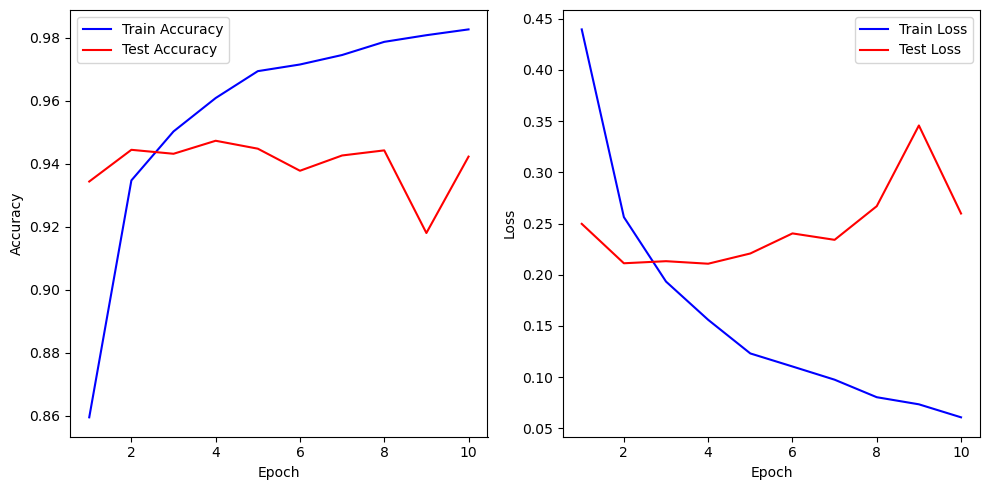

In [31]:
# learning curve
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
# creating subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].plot(epochs, acc, 'b', label='Train Accuracy')
axes[0].plot(epochs, val_acc, 'r', label='Test Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

axes[1].plot(epochs, loss, 'b', label='Train Loss')
axes[1].plot(epochs, val_loss, 'r', label='Test Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()

# adusting layout for better spacing
plt.tight_layout()

# display the figure
plt.show();

In [32]:
pred = DL_model.predict(X_test)
y_pred = np.argmax(pred, axis=1)

cr = classification_report(y_test, y_pred, target_names=le.classes_)
print(cr)

174/174 ━━━━━━━━━━━━━━━━━━━━ 21s 116ms/step
                        precision    recall  f1-score   support

                 Books       0.95      0.93      0.94      1271
Clothing & Accessories       0.95      0.98      0.97      1121
           Electronics       0.92      0.92      0.92      1057
             Household       0.95      0.94      0.94      2112

              accuracy                           0.94      5561
             macro avg       0.94      0.94      0.94      5561
          weighted avg       0.94      0.94      0.94      5561



<h2>Machine Learning vs Deep Learning</h2>

In [34]:
text_input = 'A famous brand for keyboard and mouse is currently offering promotions on their products.'
cleaned_text = preprocess_text(text_input)
vectorized = vectorizer.transform([cleaned_text])
ML_prediction = MNB_model.predict(vectorized)
ML_predicted_label = label_mapping[ML_prediction[0]]
print("ML predicted label:", ML_predicted_label)
    
def DL_predict_text(text):
    seq = tokenizer.texts_to_sequences([text])
    pad = pad_sequences(seq, maxlen=100)
    pred = DL_model.predict(pad) 
    pred_class = np.argmax(pred[0])
    return le.inverse_transform([pred_class])[0]
print("DL predicted class:", DL_predict_text(text_input))

ML predicted label: Electronics
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
DL predicted class: Electronics
